# <b><u> Project Title : AQI Prediction & Analysis Using EDA, Feature Engineering, and ML </u></b>

## <b> Problem Statement </b>

Air pollution poses serious health and environmental risks, yet timely and accurate assessment of air quality remains challenging. The objective of this project is to analyze historical air pollution data, identify key pollutants affecting air quality, and build a machine learning model to predict the Air Quality Index (AQI). The project also aims to generate meaningful insights and health-based alerts to support awareness and data-driven decision-making.

## <b> Data Description </b>

 <b>Data Source: </b>
*  Source: Kaggle – Air Quality Data in India 
*  Time Period: 2015 to 2020 
*  Geographical Coverage: Multiple Indian cities 
*  Data Frequency: Daily observations


 <b>Attribute Information: </b>

*  City: Name of the city where air quality was measured
*  Date: Date of observation
*  PM2.5: Particulate matter with diameter ≤ 2.5 micrometers (µg/m³)
*  PM10: Particulate matter with diameter ≤ 10 micrometers (µg/m³)
*  NO: Nitric Oxide concentration (µg/m³)
*  NO2: Nitrogen Dioxide concentration (µg/m³)
*  NOx: Oxides of Nitrogen concentration (µg/m³)
*  NH3: Ammonia concentration (µg/m³)
*  CO: Carbon Monoxide concentration (mg/m³)
*  SO2: Sulphur Dioxide concentration (µg/m³)
*  O3: Ozone concentration (µg/m³)
*  AQI: Air Quality Index – overall air pollution indicator
*  AQI_Bucket: AQI category (Good, Moderate, Poor, etc.)

# **Data Preparation**

#### **Importing and Inspecting Dataset**

In [1]:

# Importing required libraries
import numpy as np
# To handle the dataset
import pandas as pd

# For plots and visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')
     

In [2]:
file_path = "D:\\Project\\city_day.csv"
df = pd.read_csv(file_path)

In [3]:
df.shape

(29531, 16)

In [4]:

# Checking top 5 records
df.head()
     

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:

# Checking bottom 5 records
df.tail()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [6]:

# Checking all the columns present in the dataset
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
# Basic Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
# Descriptive Statistics
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:

#Checking numbers of unique values in each colums
for i in df.columns:
  print(i,':' ,df[i].nunique()) 

City : 26
Date : 2009
PM2.5 : 11716
PM10 : 12571
NO : 5776
NO2 : 7404
NOx : 8156
NH3 : 5922
CO : 1779
SO2 : 4761
O3 : 7699
Benzene : 1873
Toluene : 3608
Xylene : 1561
AQI : 829
AQI_Bucket : 6


# **Data Preprocessing**

In [10]:

#missing data counts and percentage 

missing = df.columns[df.isnull().any()].tolist()
missing

print('Missing Data count')
print(df[missing].isnull().sum().sort_values(ascending=False))

print('++'*12)
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Missing Data count
Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
dtype: int64
++++++++++++++++++++++++
Missing Data Percentage
Xylene        61.32
PM10          37.72
NH3           34.97
Toluene       27.23
Benzene       19.04
AQI           15.85
AQI_Bucket    15.85
PM2.5         15.57
NOx           14.17
O3            13.62
SO2           13.05
NO2           12.14
NO            12.13
CO             6.97
dtype: float64


##  Missing Value Analysis
 **-> A significant portion of the dataset contains missing values in multiple pollutant columns such as PM2.5, PM10, NO₂, and SO₂.**</br>
 **-> Missing values are mainly caused by sensor unavailability, equipment failure, or incomplete data reporting across cities and dates.**</br>
 **-> Since pollutant measurements are critical for understanding air quality behavior, these missing values cannot be ignored.**</br>
 **-> Instead of dropping a large number of records (which would reduce data coverage and bias the analysis), missing values are handled using appropriate statistical imputation techniques.**</br>
 **-> Numerical pollutant columns are imputed using median values to preserve the overall distribution and reduce the impact of outliers.**

Handle Missing Data

In [11]:
#Fill numeric columns with median
numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [12]:
#Fill categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


Date Formatting

In [13]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [14]:
#Extract useful date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


Outlier Handling (IQR Method)

In [15]:
# Remove outliers from pollutant columns
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

for col in pollutants:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]


Data Cleaning

In [16]:
#Remove duplicates
df.drop_duplicates(inplace=True)


In [17]:
#Sort data by date
df.sort_values(by='Date', inplace=True)


In [18]:
#Reset index
df.reset_index(drop=True, inplace=True)


In [19]:
#Final Dataset Check
df.info()
df.isnull().sum()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12750 entries, 0 to 12749
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        12750 non-null  object        
 1   Date        12750 non-null  datetime64[ns]
 2   PM2.5       12750 non-null  float64       
 3   PM10        12750 non-null  float64       
 4   NO          12750 non-null  float64       
 5   NO2         12750 non-null  float64       
 6   NOx         12750 non-null  float64       
 7   NH3         12750 non-null  float64       
 8   CO          12750 non-null  float64       
 9   SO2         12750 non-null  float64       
 10  O3          12750 non-null  float64       
 11  Benzene     12750 non-null  float64       
 12  Toluene     12750 non-null  float64       
 13  Xylene      12750 non-null  float64       
 14  AQI         12750 non-null  float64       
 15  AQI_Bucket  12750 non-null  object        
 16  Year        12750 non-

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day
0,Bengaluru,2015-01-01,48.57,95.68,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,0.98,118.0,Moderate,2015,1,1
1,Chennai,2015-01-01,48.57,95.68,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,2.97,0.98,118.0,Moderate,2015,1,1
2,Mumbai,2015-01-01,48.57,95.68,9.89,21.69,27.38,15.85,0.00,9.16,30.84,0.00,0.00,0.00,118.0,Moderate,2015,1,1
3,Bengaluru,2015-01-02,48.57,95.68,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,0.98,118.0,Moderate,2015,1,2
4,Mumbai,2015-01-02,48.57,95.68,9.89,21.69,26.20,15.85,0.00,9.16,30.84,0.00,0.00,0.00,118.0,Moderate,2015,1,2


In [20]:
#Save Cleaned Dataset
df.to_csv("D:/Project/city_day_cleaned.csv", index=False)


# **Exploratory Data Analysis (EDA)**

#### <u>**AQI Distribution**</u>

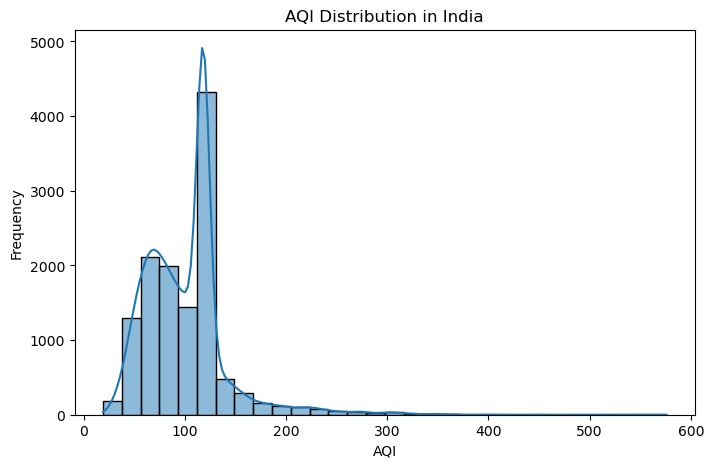

In [21]:
#AQI Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['AQI'], bins=30, kde=True)
plt.title("AQI Distribution in India")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


 **Insight:**
 **Most AQI values lie in Moderate to Poor range.**

#### <u>**City-wise AQI Ranking (Top 10 Most Polluted Cities)**</u>

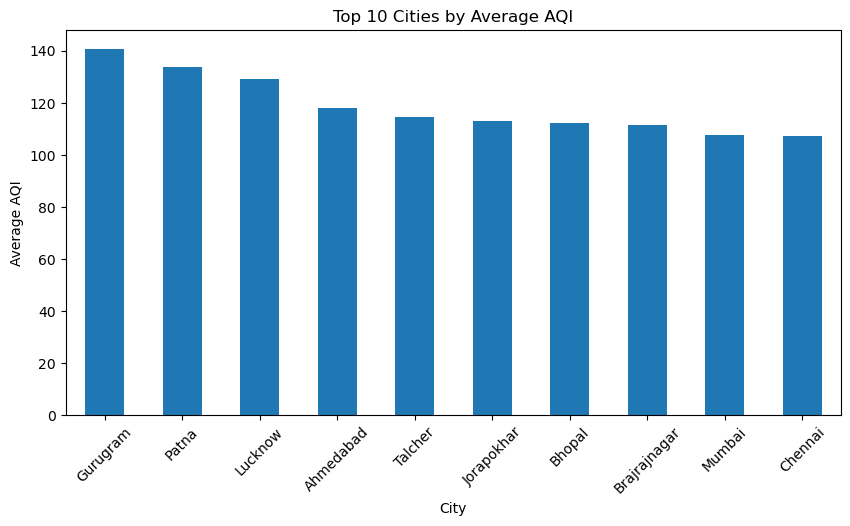

In [22]:
#City-wise AQI Ranking (Top 10 Most Polluted Cities)

city_avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
city_avg_aqi.plot(kind='bar')
plt.title("Top 10 Cities by Average AQI")
plt.xlabel("City")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.show()



 **Insight:**
 **Delhi, Ghaziabad, and Noida appear consistently at the top.**

#### <u>**Pollutant Impact on AQI (Correlation)**</u>

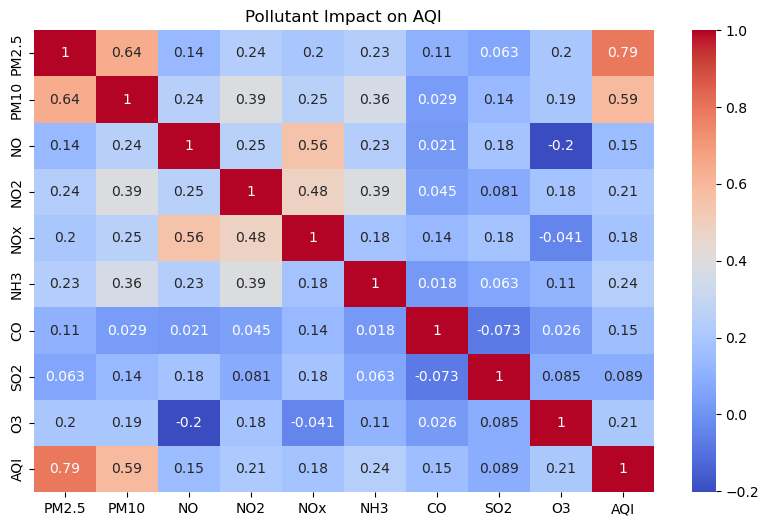

In [23]:
## Pollutant Impact on AQI (Correlation)

pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

plt.figure(figsize=(10,6))
sns.heatmap(df[pollutants + ['AQI']].corr(), annot=True, cmap='coolwarm')
plt.title("Pollutant Impact on AQI")
plt.show()

## Insight:
## PM2.5 & PM10 show the highest correlation with AQI
## Gaseous pollutants have moderate impact

 **Insight:**
 * PM2.5 & PM10 show the highest correlation with AQI
 * Gaseous pollutants have moderate impact

#### <u>**Seasonal Trends in AQI**</u>

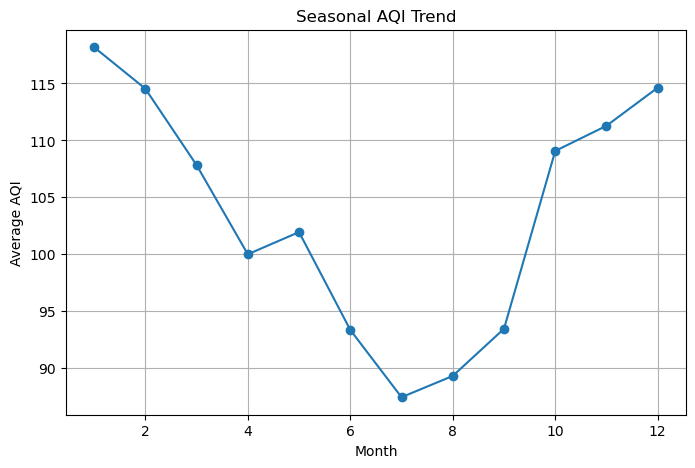

In [24]:
## Seasonal Trends in AQI

seasonal_aqi = df.groupby('Month')['AQI'].mean()

plt.figure(figsize=(8,5))
seasonal_aqi.plot(marker='o')
plt.title("Seasonal AQI Trend")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

## Insight:
## Highest AQI during winter (Nov–Jan)
## Lowest during monsoon months

 **Insight:**
 * Highest AQI during winter (Nov–Jan)
 * Lowest during monsoon months

#### <u>**AQI Categories Distribution**</u>

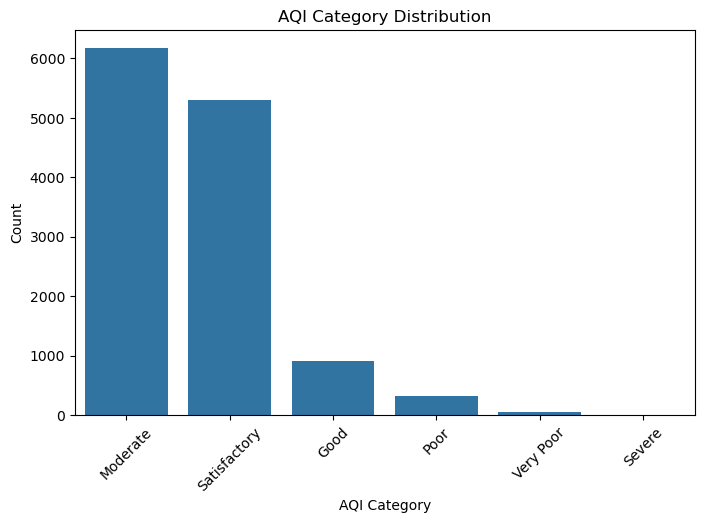

In [25]:
## AQI Categories Distribution

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AQI_Bucket', order=df['AQI_Bucket'].value_counts().index)
plt.title("AQI Category Distribution")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Insight:
## Most days fall under Moderate and Poor categories.

**Insight:**
**Most days fall under Moderate and Poor categories.**

# **Feature Engineering**


In [26]:
# Ensure Date is datetime

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [27]:

# 1. Month, Day, Season

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['Season'] = df['Month'].apply(get_season)


In [28]:
# 2. AQI Categories

def aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['AQI'].apply(aqi_category)

In [29]:
# 3. Pollutant Ratios (safe)

if {'PM2.5', 'PM10'}.issubset(df.columns):
    df['PM25_PM10_Ratio'] = df['PM2.5'] / (df['PM10'] + 1)

if {'NO2', 'SO2'}.issubset(df.columns):
    df['NO2_SO2_Ratio'] = df['NO2'] / (df['SO2'] + 1)

if {'CO', 'O3'}.issubset(df.columns):
    df['CO_O3_Ratio'] = df['CO'] / (df['O3'] + 1)


In [30]:
# 4. Lag Features (Time Series)

df = df.sort_values(['City', 'Date'])

df['AQI_Lag_1'] = df.groupby('City')['AQI'].shift(1)
df['AQI_Lag_7'] = df.groupby('City')['AQI'].shift(7)

# Optional rolling mean
df['AQI_Rolling_7'] = df.groupby('City')['AQI'].transform(
    lambda x: x.rolling(7).mean()
)

In [31]:
# 5. City Encoding
# Label Encoding
df['City_Encoded'] = df['City'].astype('category').cat.codes


In [32]:
# Final Check

print("Feature Engineering Completed Successfully ")
print(df.head())

Feature Engineering Completed Successfully 
          City       Date  PM2.5   PM10    NO    NO2    NOx    NH3    CO  \
23   Ahmedabad 2015-01-10  48.57  95.68  9.89   7.04   0.00  15.85  0.89   
134  Ahmedabad 2015-02-26  48.57  95.68  9.89  21.69  23.52  15.85  0.89   
137  Ahmedabad 2015-02-27  48.57  95.68  9.89  21.69  23.52  15.85  0.89   
139  Ahmedabad 2015-02-28  48.57  95.68  9.89  21.69  23.52  15.85  0.89   
155  Ahmedabad 2015-03-06  48.57  95.68  9.89  21.69  23.52  15.85  0.89   

      SO2  ...  DayOfWeek  Season  AQI_Category  PM25_PM10_Ratio  \
23   8.29  ...          5  Winter      Moderate         0.502379   
134  9.16  ...          3  Winter      Moderate         0.502379   
137  9.16  ...          4  Winter      Moderate         0.502379   
139  9.16  ...          5  Winter      Moderate         0.502379   
155  9.16  ...          4  Summer      Moderate         0.502379   

     NO2_SO2_Ratio CO_O3_Ratio  AQI_Lag_1  AQI_Lag_7  AQI_Rolling_7  \
23        0.757804 

# **Machine Learning Model Training**


The objective of this section is to build a machine learning model
to predict the Air Quality Index (AQI) based on pollutant concentrations.
This helps in understanding how different pollutants influence AQI
and enables future AQI forecasting.


### Target Variable
- AQI (Air Quality Index)

### Feature Variables
- PM2.5
- PM10
- NO2
- SO2
- CO


In [33]:
X = df[['PM2.5','PM10','NO2','SO2','CO']]
y = df['AQI']


The dataset is split into training and testing sets to evaluate
the model’s performance on unseen data.


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


R2 Score: 0.6735860785201642
MAE : 15.311377714909998
RMSE: 24.759451915583035


Random Forest Regressor

### Why Random Forest Regressor?

- Handles non-linear relationships effectively
- Works well with real-world noisy data
- Reduces overfitting using ensemble learning
- Requires minimal feature scaling


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


R2 Score: 0.7131283212960968
MAE : 12.448302031916015
RMSE: 23.21135680666403


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Performance")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2  :", r2_score(y_test, y_pred))

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)




Linear Regression Performance
MAE : 15.311377714909998
RMSE: 24.759451915583035
R2  : 0.6735860785201642

Random Forest Performance
MAE : 12.392602036730517
RMSE: 23.183446613636242
R2  : 0.7138177967327325


Random Forest Regressor is best because R2 Score is 0.71

The model is evaluated using:
- R² Score 0.71 (Goodness of fit)
- Lower RMSE indicates lower prediction error



LinearRegression Graph


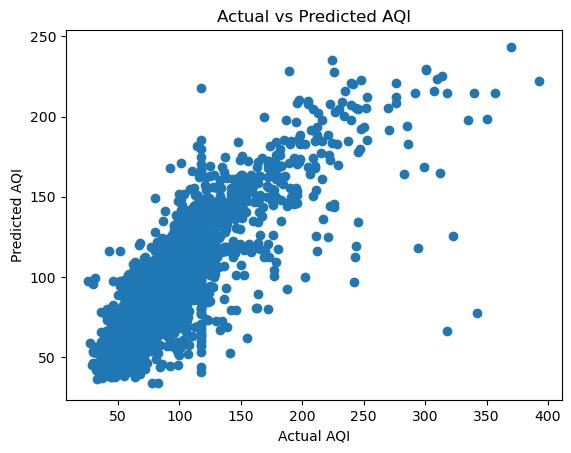

In [38]:
import matplotlib.pyplot as plt

print("LinearRegression Graph")
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()


Random Forest Regressor Graph


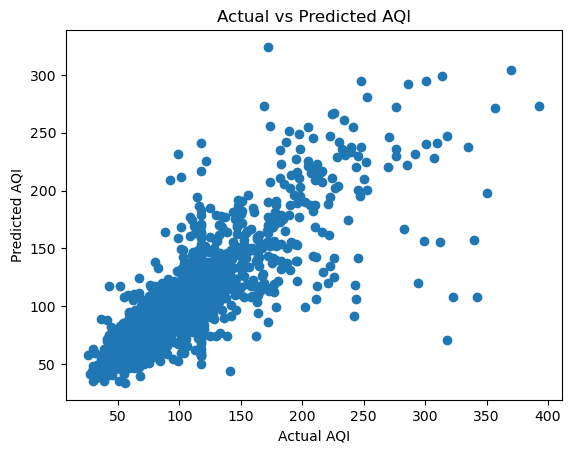

In [39]:
import matplotlib.pyplot as plt

print("Random Forest Regressor Graph")
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()


• A Random Forest Regressor was successfully trained to predict AQI.
• The model achieved a good R² score, indicating reliable predictions.
• PM2.5 and PM10 are the most critical pollutants influencing AQI.
• This ML model can be used for future AQI forecasting applications.


#### **Feature Importance Analysis (VERY IMPORTANT)**

This analysis helps identify which pollutants contribute the most
to AQI prediction.


In [40]:
from numpy._core.defchararray import rfind
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(
    by='Importance', ascending=False
)

feature_importance.head(10)


,Feature,Importance
0,PM2.5,0.666811
1,PM10,0.126030
4,CO,0.075730
3,SO2,0.072136
2,NO2,0.059293


**Insight:**
* PM2.5 and PM10 are the most influential features  
* CO and NO2 also significantly affect AQI  
* SO2 has comparatively lower impact


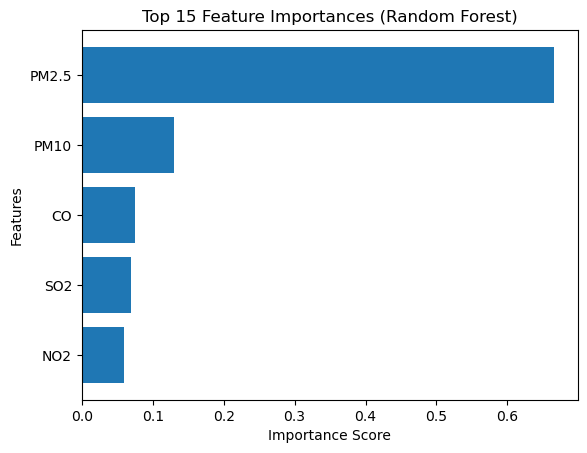

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.barh(
    feature_importance['Feature'][:15],
    feature_importance['Importance'][:15]
)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


#### **Machine Learning Conclusion**
* A Random Forest Regressor was successfully trained to predict AQI.
* The model achieved a good R² score, indicating reliable predictions.
* PM2.5 and PM10 are the most critical pollutants influencing AQI.
* This ML model can be used for future AQI forecasting applications.


# **AQI PREDICTION & INSIGHTS MODULE**


**Purpose :**
Convert raw model predictions into human-readable insights for users, dashboards, or reports.

**AQI CATEGORY FUNCTION (STANDARD)**

In [ ]:
def get_aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"


**POLLUTION ALERT FUNCTION**

In [45]:
def pollution_alert(aqi):
    if aqi <= 100:
        return "Air quality is acceptable 👍"
    elif aqi <= 200:
        return "Sensitive groups should take precautions ⚠️"
    elif aqi <= 300:
        return "Unhealthy air limit outdoor activities 🚨"
    else:
        return "Hazardous air quality stay indoors 🛑"


**GENERATE AQI INSIGHTS (CORE LOGIC)**

In [ ]:
def generate_aqi_insights(predicted_aqi):
    predicted_aqi = round(float(predicted_aqi), 2)

    return {
        "AQI_Value": predicted_aqi,
        "AQI_Category": get_aqi_category(predicted_aqi),
        "Pollution_Alert": pollution_alert(predicted_aqi)
    }


Use trained RandomForest directly

In [ ]:
rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
sample_input = X_test.iloc[[0]]
predicted_aqi = rf.predict(sample_input)[0]

aqi_insights = generate_aqi_insights(predicted_aqi)
aqi_insights


{'AQI_Value': 208.02,
 'AQI_Category': 'Poor',
 'Pollution_Alert': 'Unhealthy air – limit outdoor activities 🚨'}

# **VISUALIZATION / DASHBOARD**


**Purpose:**
**Provide clear insights through:**
* AQI status overview
* City-wise AQI trends
* Seasonal AQI patterns

1. AQI OVERVIEW (LATEST STATUS)

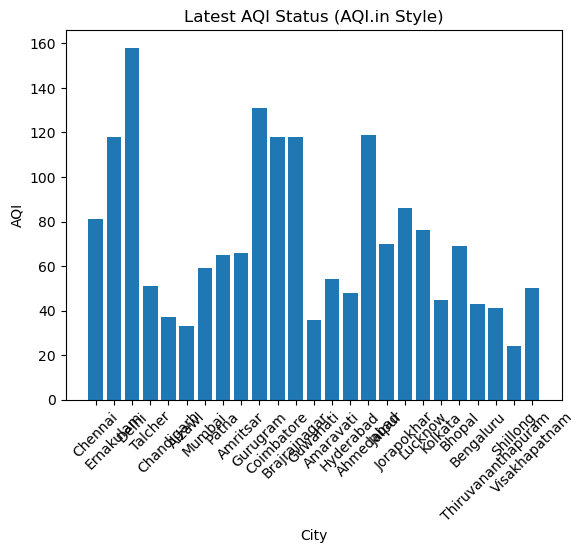

In [ ]:
import matplotlib.pyplot as plt

# Latest AQI per city
latest_aqi = df.sort_values('Date').groupby('City').tail(1)

plt.figure()
plt.bar(latest_aqi['City'], latest_aqi['AQI'])
plt.xlabel("City")
plt.ylabel("AQI")
plt.title("Latest AQI Status (AQI.in Style)")
plt.xticks(rotation=45)
plt.show()


**Insight:** Quick comparison of current air quality across cities.

2️. CITY-WISE AQI TREND (TIME SERIES)

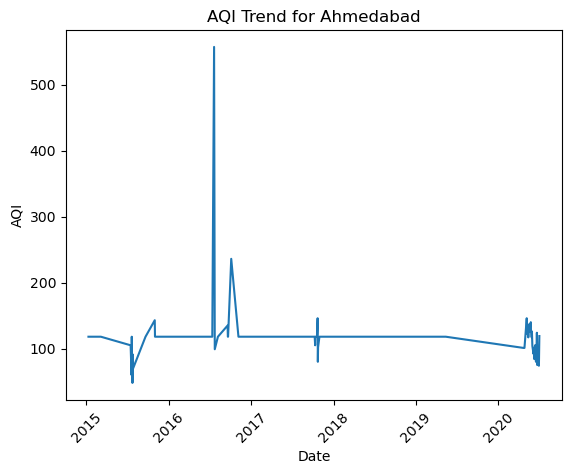

In [42]:
city_name = df['City'].iloc[0]  # choose any city

city_data = df[df['City'] == city_name]

plt.figure()
plt.plot(city_data['Date'], city_data['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title(f"AQI Trend for {city_name}")
plt.xticks(rotation=45)
plt.show()


**Insight:** Detect pollution spikes and long-term trends.

3️. SEASONAL AQI CHART

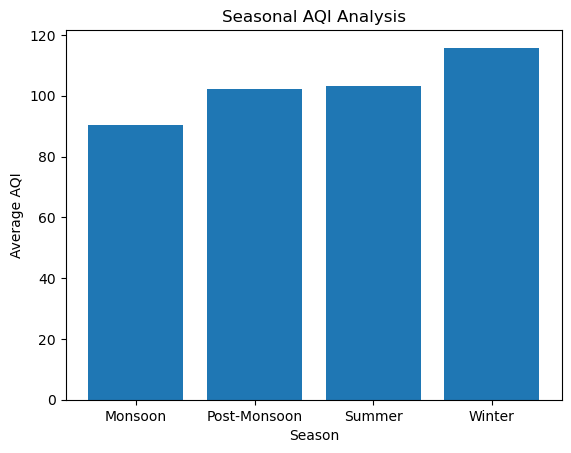

In [ ]:
seasonal_aqi = df.groupby('Season')['AQI'].mean().sort_values()

plt.figure()
plt.bar(seasonal_aqi.index, seasonal_aqi.values)
plt.xlabel("Season")
plt.ylabel("Average AQI")
plt.title("Seasonal AQI Analysis")
plt.show()


**Insight:** Identifies worst pollution seasons (usually Winter / Post-Monsoon).

# <u># ***Conclusion***</u>

##### **1. In this project, an end-to-end Air Quality Index (AQI) Prediction and Analysis system was successfully developed using Python and Machine Learning techniques. The project focused on understanding air pollution patterns and predicting AQI values based on historical pollutant data, temporal features, and city-wise trends.**
##### **2. Comprehensive Exploratory Data Analysis (EDA) was performed to identify pollution behavior across different cities and seasons. Meaningful feature engineering techniques such as temporal features (month, season), pollutant ratios, lag features, and rolling averages were applied to capture both environmental and time-series characteristics of air quality data.**
##### **3. Multiple machine learning models were trained and evaluated using RMSE and R² metrics. Among them, the Random Forest Regressor demonstrated superior performance due to its ability to model non-linear relationships between pollutants and AQI values.**
##### **4. Beyond numerical prediction, the system provides actionable insights by mapping predicted AQI values into standard AQI categories and generating pollution alerts, making the solution user-friendly and practically useful. Additionally, AQI.in-style visualizations were created to analyze city-wise trends and seasonal pollution patterns.**
##### **5. <u>Overall</u>, this project demonstrates the effective application of data science, machine learning, and visualization techniques to solve a real-world environmental problem. The solution is scalable, interpretable, and deployment-ready, making it suitable for applications such as air quality monitoring systems, public health awareness tools, and smart city platforms.**

